In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

### Рассмотрим задачу регрессии на примере diabetes dataset.

### 1. Загрузим данные.

In [3]:
def make_dataframe(ds_function):
    ds = ds_function()
    df = pd.DataFrame(data= np.c_[ds['data'], ds['target']],
                     columns= list(ds['feature_names']) + ['target'])
    return df

In [4]:
df = make_dataframe(load_diabetes)
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


### 2. Разделим выборку на обучающую и тестовую.

In [20]:
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 10)

### 3. Обучим модели случайного леса и градиентного бустинга и сравним качество по среднеквадратичной ошибке.

In [21]:
rf = RandomForestRegressor()
gb = GradientBoostingRegressor()

In [22]:
rf.fit(X_train, y_train)
gb.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
gb_pred = gb.predict(X_test)

In [23]:
print('Random forest MSE: ', mean_squared_error(y_test, rf_pred))
print('Gradient Boosting MSE: ', mean_squared_error(y_test, gb_pred))

Random forest MSE:  3400.4640741573035
Gradient Boosting MSE:  3397.7310844386166


#### Качество моделей прктически одинаковое.

#### Посмотрим как предсказания соотносятся с реальными значениями.

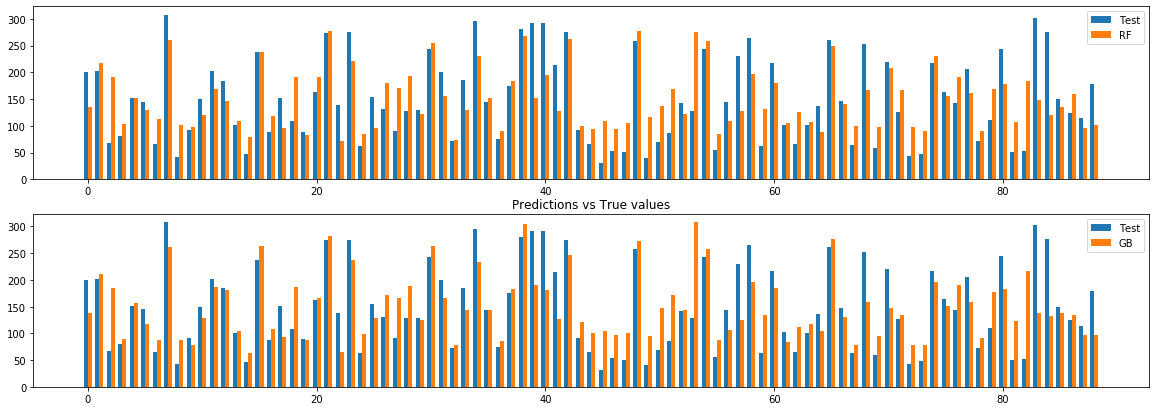

In [33]:
x = np.arange(len(y_test))
width = 0.35

fig, ax = plt.subplots(2, 1, figsize=(20, 7))

rects1 = ax[0].bar(x - width/2, y_test, width, label='Test')
rects2 = ax[0].bar(x + width/2, rf_pred, width, label='RF')
ax[0].legend()
rects3 = ax[1].bar(x - width/2, y_test, width, label='Test')
rects4 = ax[1].bar(x + width/2, gb_pred, width, label='GB')
ax[1].legend();